A smiple Neural network with one hidden layer - code adapted from pytorch tutorial

In [1]:
import numpy as np

N = number of data samples;
D = dimentions of the input data;
H = number of units in the hidden layer;
O = number of target values; 

In [20]:
N, D, H, O = 200, 20, 300, 5

In [21]:
x = np.random.randn(N,D) #generate N samples for input with D dimentions

In [22]:
y = np.random.randn(N,O)

Randomly intialise the weights for each layer

In [23]:
w1 = np.random.randn(D,H)

w2 = np.random.randn(H,O)

In [24]:
learning_rate = 1e-6

In [25]:
epoch = 10000

In [26]:
LOG_EVERY_N = 1000

In [27]:
save_grad_w1 = []
save_grad_w2 = []
num =0

for t in range (epoch):
    h = x.dot(w1)
    h_ReLu = np.maximum(h,0)
    y_pred = h_ReLu.dot(w2)
    
    l2_loss = np.square(y_pred - y).sum()
    
    if (t % LOG_EVERY_N) == 0:
        print ("-" * 89)
        print ('| epoch {:3d} | valid loss | '.format(t))
        print (l2_loss)
    
    
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_ReLu.T.dot(grad_y_pred)
    
    grad_h_ReLu =grad_y_pred.dot(w2.T)
    grad_h = grad_h_ReLu.copy()
    
    grad_h[h<0] = 0
    
    grad_w1 = x.T.dot(grad_h)
    
    w1 = w1 - learning_rate * grad_w1
    w2 = w2 - learning_rate * grad_w2
    
    if (t % LOG_EVERY_N) == 0:
        save_grad_w1.append(grad_w1)
        save_grad_w2.append(grad_w2)
        num = num+1

-----------------------------------------------------------------------------------------
| epoch   0 | valid loss | 
2074350.4589859773
-----------------------------------------------------------------------------------------
| epoch 1000 | valid loss | 
5800.75943490807
-----------------------------------------------------------------------------------------
| epoch 2000 | valid loss | 
1241.7408663439574
-----------------------------------------------------------------------------------------
| epoch 3000 | valid loss | 
371.4925481120647
-----------------------------------------------------------------------------------------
| epoch 4000 | valid loss | 
128.55993884690398
-----------------------------------------------------------------------------------------
| epoch 5000 | valid loss | 
48.61484878569162
-----------------------------------------------------------------------------------------
| epoch 6000 | valid loss | 
19.43733793574361
----------------------------------------

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

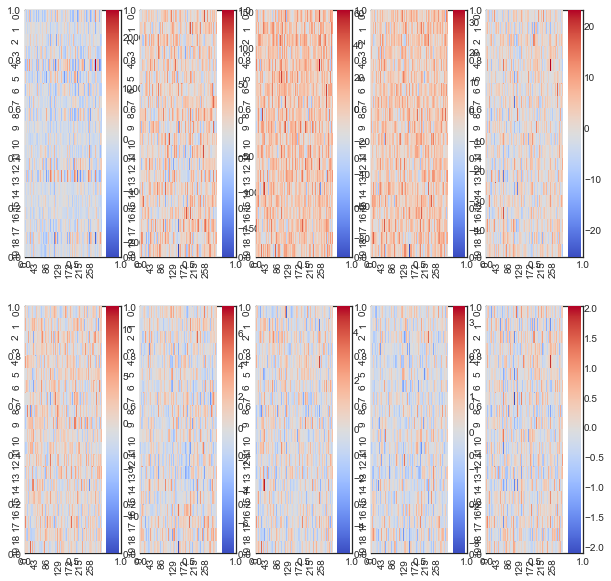

In [29]:
plt.style.use('seaborn-white')
f, ax = plt.subplots(2, 5 , figsize=(10,10), sharex='row', sharey='col' )

i=1
j = int (epoch/LOG_EVERY_N)
for item in save_grad_w1:
    ax = f.add_subplot(2, 5, i)
    sns.heatmap(item, cmap='coolwarm')
    i +=1
    

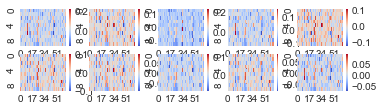

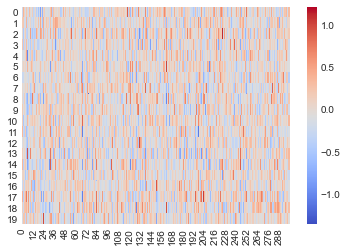

In [30]:
sns.heatmap(grad_w1, cmap='coolwarm')